# IBM Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option('display.max_rows', None)

## Import csv file

In [2]:
df = pd.read_csv(r"C:\Users\PC 2\Desktop\Data Analisis\Jupyter\Used_data\Employees.csv")

In [3]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
917,34,No,Travel_Rarely,131,Sales,2,3,Marketing,1,1281,3,Female,86,3,2,Sales Executive,1,Single,4538,6039,0,Y,Yes,12,3,4,80,0,4,3,3,3,2,0,2
614,26,Yes,Travel_Frequently,887,Research & Development,5,2,Medical,1,848,3,Female,88,2,1,Research Scientist,3,Married,2366,20898,1,Y,Yes,14,3,1,80,1,8,2,3,8,7,1,7
648,37,No,Travel_Frequently,1231,Sales,21,2,Medical,1,900,3,Female,54,3,1,Sales Representative,4,Married,2973,21222,5,Y,No,15,3,2,80,1,10,3,3,5,4,0,0
1187,38,No,Travel_Frequently,1189,Research & Development,1,3,Life Sciences,1,1668,4,Male,90,3,2,Research Scientist,4,Married,4735,9867,7,Y,No,15,3,4,80,2,19,4,4,13,11,2,9
214,30,Yes,Travel_Rarely,1005,Research & Development,3,3,Technical Degree,1,297,4,Female,88,3,1,Research Scientist,1,Single,2657,8556,5,Y,Yes,11,3,3,80,0,8,5,3,5,2,0,4


## Job Satisfaction by Role

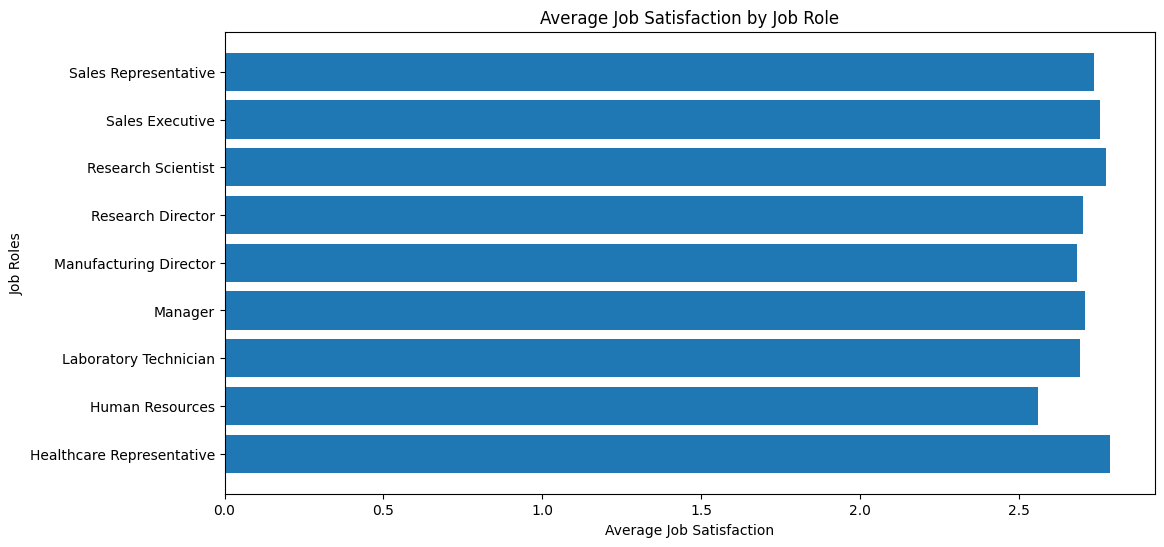

In [4]:
happiness = df.groupby(["JobRole"])["JobSatisfaction"].mean()
plt.figure(figsize=(12, 6))
plt.barh(happiness.index ,happiness)
plt.xlabel('Average Job Satisfaction')
plt.ylabel('Job Roles')
plt.title('Average Job Satisfaction by Job Role')
plt.show()


## Income by age groups

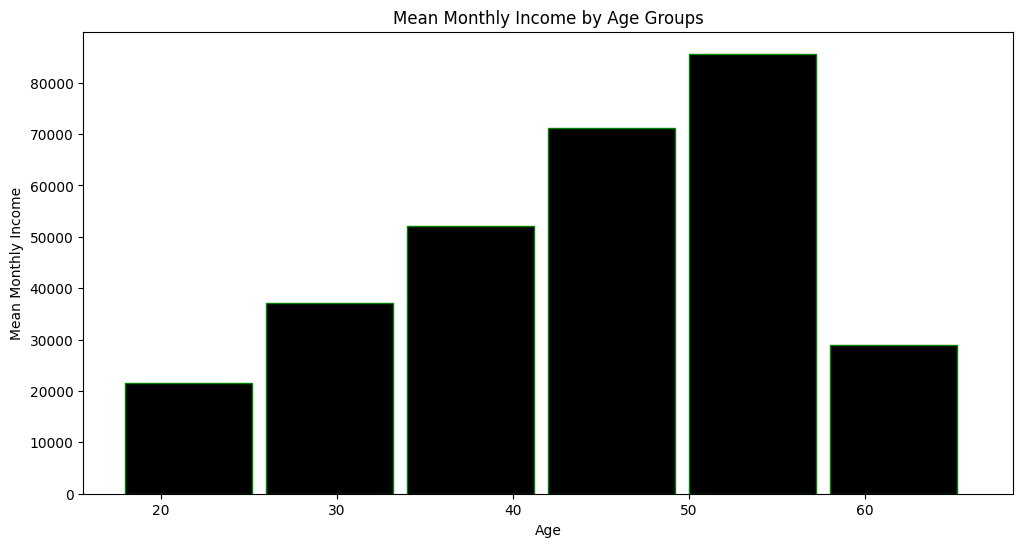

In [5]:
satisfaction = df.groupby("Age")["MonthlyIncome"].mean().sort_index()
binwidth = 8
plt.figure(figsize=(12, 6))
age_bins = list(range(min(satisfaction.index), max(satisfaction.index) + binwidth, binwidth))

plt.hist(satisfaction.index, bins=age_bins, weights=satisfaction.values, edgecolor="g", color="black", width=binwidth*0.9)

plt.xlabel('Age')
plt.ylabel('Mean Monthly Income')
plt.title('Mean Monthly Income by Age Groups')
plt.show()

## Average Distance from Home with Attrition Percentage by Job Role

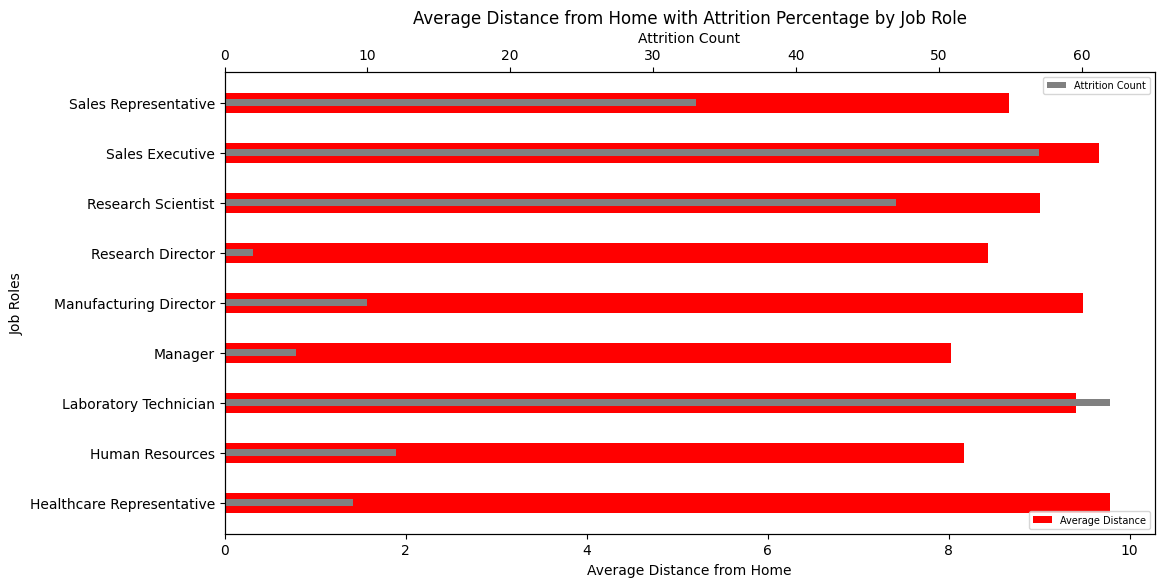

In [6]:
distance = df.groupby("JobRole")["DistanceFromHome"].mean()
att = df.groupby("JobRole")["Attrition"].apply(lambda x: (x == "Yes").sum())

fig, ax1 = plt.subplots(figsize=(12,6))

bars = ax1.barh(distance.index, distance, color='red', label='Average Distance', height=0.4)
ax1.set_xlabel('Average Distance from Home')
ax1.set_ylabel('Job Roles')
ax1.legend(loc="lower right", fontsize=7)

ax2 = ax1.twiny()
bars2 = ax2.barh(att.index, att, color='grey', label='Attrition Count', height=0.15)
ax2.set_xlabel('Attrition Count')
ax2.legend(loc="upper right", fontsize=7)


plt.title('Average Distance from Home with Attrition Percentage by Job Role')
plt.show()

## Average monthly income by education and attrition

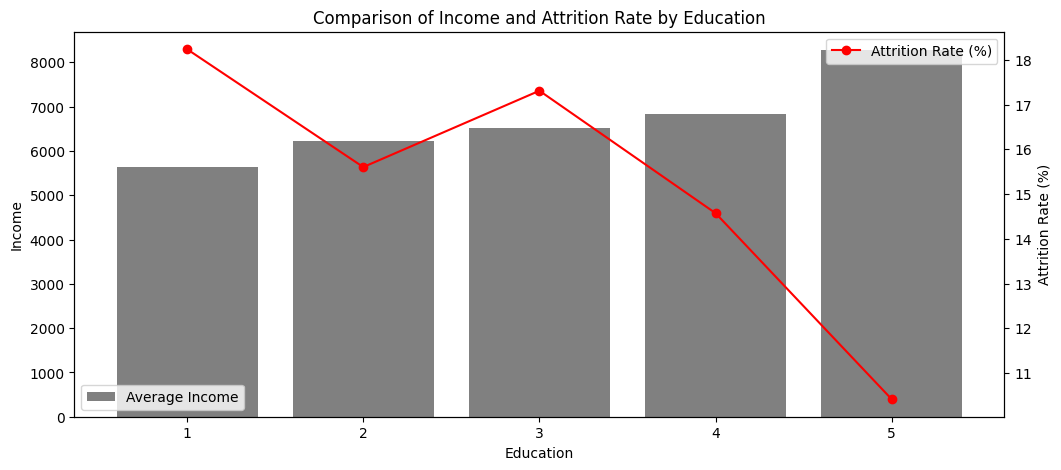

In [7]:
education = df.groupby("Education")["MonthlyIncome"].mean()
total_employees_per_education = df['Education'].value_counts()
fig, ax1 = plt.subplots(figsize=(12, 5))

yes_counts = df[df['Attrition'] == 'Yes'].groupby('Education')['Attrition'].count()
total_education_counts = df.groupby('Education')['Attrition'].count()
yes_percentages = (yes_counts / total_education_counts) * 100

ax1.bar(education.index, education, color='grey', label='Average Income')
ax1.set_xlabel("Education")
ax1.set_ylabel("Income")
ax1.legend(loc="lower left")

ax2 = ax1.twinx()
ax2.plot(education.index, yes_percentages, color="red", marker='o', label='Attrition Rate (%)')
ax2.set_ylabel('Attrition Rate (%)')
ax2.legend(loc="upper right")

plt.title('Comparison of Income and Attrition Rate by Education')
plt.show()
